In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="darkgrid", palette='flare')

In [ ]:
train = pd.read_csv("Train.csv")

In [ ]:
train.shape

(100000, 25)

In [ ]:
train.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,NaN,2,59,3,0,30.0,1.0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,4510000
1,1,2011-1,667,NaN,10,50,2,1,25.0,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,13231000
2,2,2011-1,90,0.0,1,48,2,0,25.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2008000
3,3,2011-1,94,1.0,3,62,3,1,30.0,NaN,3,0,1,0,0,0,0,0,0,0,0,0,0,0,12680000
4,4,2011-1,232,0.0,3,60,3,0,25.0,NaN,3,0,1,0,0,0,0,0,0,0,0,0,0,0,3335000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          100000 non-null  int64  
 1   date        100000 non-null  object 
 2   street_id   100000 non-null  int64  
 3   build_tech  70265 non-null   float64
 4   floor       100000 non-null  int64  
 5   area        100000 non-null  int64  
 6   rooms       100000 non-null  int64  
 7   balcon      100000 non-null  int64  
 8   metro_dist  95104 non-null   float64
 9   g_lift      70008 non-null   float64
 10  n_photos    100000 non-null  int64  
 11  kw1         100000 non-null  int64  
 12  kw2         100000 non-null  int64  
 13  kw3         100000 non-null  int64  
 14  kw4         100000 non-null  int64  
 15  kw5         100000 non-null  int64  
 16  kw6         100000 non-null  int64  
 17  kw7         100000 non-null  int64  
 18  kw8         100000 non-null  int64  
 19  kw9

Разделим фичи и таргет:

In [ ]:
train.drop(columns='id', inplace=True) # дропаем айдишник объекта

# Предобработка данных

In [ ]:
train.describe()

,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
count,100000.000000,70265.000000,100000.000000,100000.00000,100000.000000,100000.000000,95104.000000,70008.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,1.000000e+05
mean,334.479290,0.529837,5.267680,52.25343,2.118680,0.396740,22.154431,0.500986,2.470910,0.055650,0.631110,0.007270,0.006300,0.004360,0.001430,0.000940,0.007910,0.007890,0.00218,0.000320,0.001210,0.00021,5.138396e+06
std,194.004755,0.573645,3.905558,17.79250,0.829688,0.547632,8.286241,0.500003,1.944981,0.229246,0.482506,0.084954,0.079123,0.065887,0.037788,0.030645,0.088586,0.088475,0.04664,0.017886,0.034764,0.01449,4.187469e+06
min,0.000000,0.000000,1.000000,29.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,4.480000e+05
25%,167.000000,0.000000,2.000000,40.00000,1.000000,0.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,2.644000e+06
50%,334.000000,0.000000,4.000000,52.00000,2.000000,0.000000,25.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,4.090000e+06
75%,501.000000,1.000000,7.000000,60.00000,3.000000,1.000000,30.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,6.281000e+06
max,671.000000,2.000000,25.000000,217.00000,6.000000,2.000000,30.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,8.054800e+07


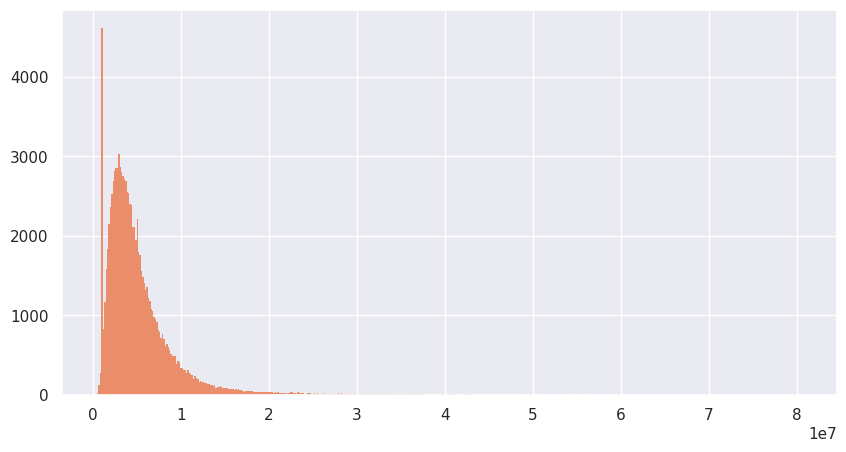

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(train['price'], bins=500, lw=0)

plt.show()

Явно заметен выброс и тяжелый хвост в правой части

In [ ]:
train['price'].value_counts()

price
1000000     4079
2935000       36
2802000       35
3200000       34
2667000       31
            ... 
33503000       1
15319000       1
13008000       1
33233000       1
20835000       1
Name: count, Length: 15007, dtype: int64

In [ ]:
train[train['price'] == 1000000].describe()

,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
count,4079.000000,2880.000000,4079.000000,4079.000000,4079.000000,4079.000000,3888.000000,2845.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.0
mean,331.845060,0.516319,5.333905,52.497181,2.118902,0.396666,22.033179,0.490685,2.469233,0.055896,0.630056,0.006864,0.005639,0.004658,0.002206,0.000735,0.007600,0.007845,0.002697,0.000245,0.001716,0.000245,1000000.0
std,195.569166,0.565057,4.001325,18.614937,0.832360,0.548348,8.341390,0.500001,1.955105,0.229749,0.482848,0.082577,0.074888,0.068099,0.046926,0.027113,0.086856,0.088235,0.051866,0.015658,0.041395,0.015658,0.0
min,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0
25%,161.000000,0.000000,2.000000,40.000000,1.000000,0.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0
50%,333.000000,0.000000,4.000000,52.000000,2.000000,0.000000,25.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0
75%,500.000000,1.000000,7.000000,60.000000,3.000000,1.000000,30.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0
max,671.000000,2.000000,25.000000,215.000000,6.000000,2.000000,30.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000000.0


У фич с "выбросным" таргетом достаточно большой(относительно их масштаба) разброс, будем считать, что это все-таки выбросы и почистим такие объекты.

In [ ]:
train.drop(train.index[train['price'] == 1000000], inplace=True)

Почистим хвост

In [ ]:
percentile_99 = train['price'].quantile(0.99)
percentile_99

22601200.00000004

In [ ]:
train.drop(train.index[ train['price'] > percentile_99], inplace=True)

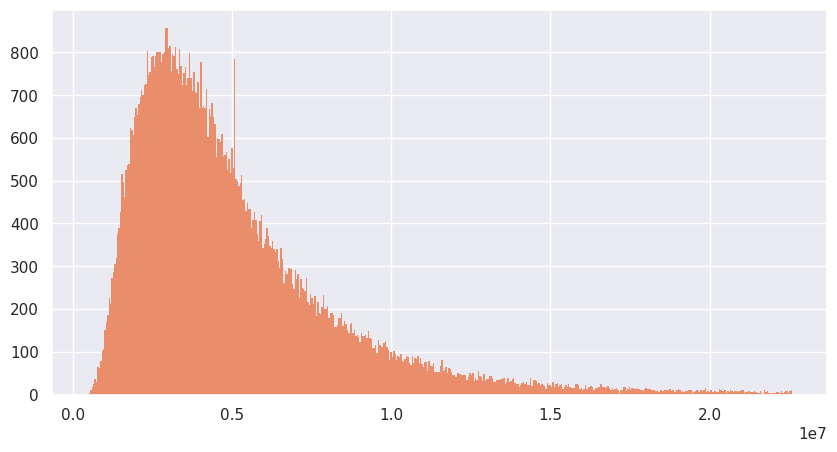

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(train['price'], bins=500, lw=0)

plt.show()

Осталось какое-то сомнительное значение на уровне 0.5 * 1e7, но пока не будем его трогать

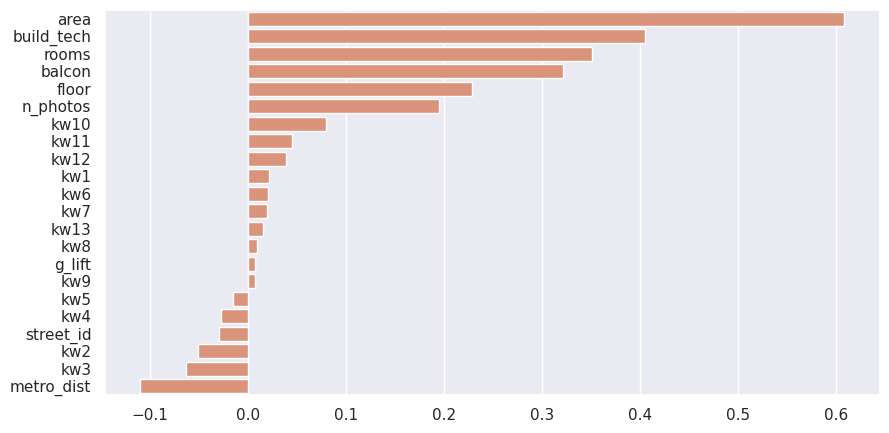

In [ ]:
numeric_data = train.drop(columns='price').select_dtypes([np.number])
numeric_features = numeric_data.columns

correlations = train[numeric_features].corrwith(train['price']).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y=correlations.index, x=correlations)
plt.xlabel('')
plt.ylabel('')
plt.show()

Большая корреляция между таргетом и площадью, можно будет построить дополнительный признак (цену за квадратный метр, например)

Неудобно работать с датой в формате год-месяц + это невозможно скормить моделям, поэтому тоже будем преобразовывать. Нагенерируем новых признаков - разделим год и месяц, посчитаем кол-во месяцев, прошедших с момента выставления первого объявления(с течением времени цена должна подниматься - инфляция и все такое)

In [ ]:
train['year'] = pd.DatetimeIndex(train['date']).year
train['month'] = pd.DatetimeIndex(train['date']).month
train['months_from_start'] = (pd.DatetimeIndex(train['date']).year - 2011) * 12 + pd.DatetimeIndex(train['date']).month

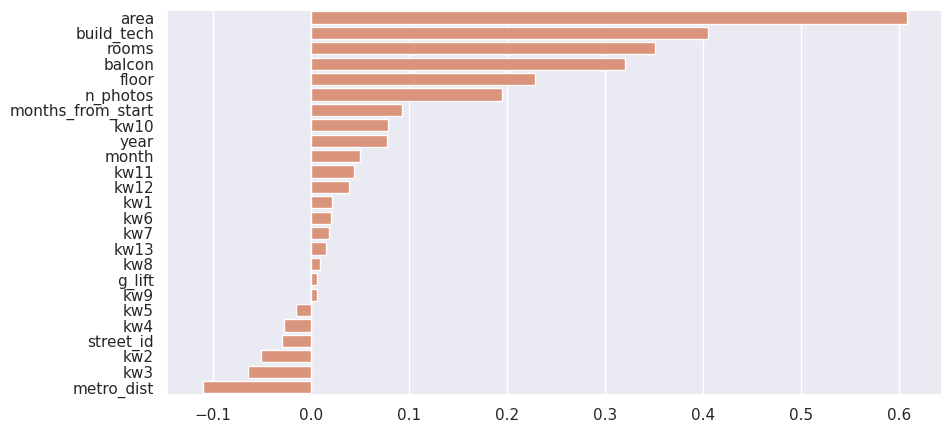

In [ ]:
numeric_data = train.drop(columns='price').select_dtypes([np.number])
numeric_features = numeric_data.columns

correlations = train[numeric_features].corrwith(train['price']).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y=correlations.index, x=correlations)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
train.drop(columns='date', inplace=True)

# Работа с пропусками

In [ ]:
train.isna().sum()

street_id                0
build_tech           28276
floor                    0
area                     0
rooms                    0
balcon                   0
metro_dist            4658
g_lift               28465
n_photos                 0
kw1                      0
kw2                      0
kw3                      0
kw4                      0
kw5                      0
kw6                      0
kw7                      0
kw8                      0
kw9                      0
kw10                     0
kw11                     0
kw12                     0
kw13                     0
price                    0
year                     0
month                    0
months_from_start        0
dtype: int64

В build_tech, metro_dist, g_lift есть пропуски - будем думать, что с ними делать

## g_lift

In [ ]:
train.g_lift.value_counts()

g_lift
1.0    33357
0.0    33139
Name: count, dtype: int64

In [ ]:
missed = ['build_tech', 'metro_dist', 'g_lift']

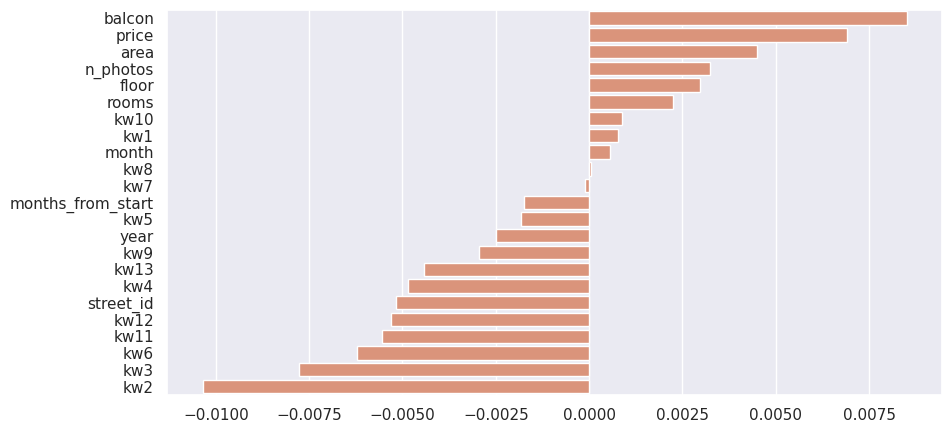

In [ ]:
features = train.drop(columns=missed).columns

correlations = train[features].corrwith(train['g_lift']).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y=correlations.index, x=correlations)
plt.xlabel('')
plt.ylabel('')
plt.show()

сам g_lift слабо коррелирует с таргетом, с другими фичами - тоже, не пропущенные значения распределены равномерно - явного алгоритма восстановления не видно. объектом с пропуском в g_lift много, удалять их все нельзя - потеряю много данных. есть идеи - либо удалить сам признак, либо заполнить пропуски рандомно 0 или 1, пока попробуем первое

In [ ]:
del train['g_lift']

## metro_dist

In [ ]:
train.metro_dist.value_counts()

metro_dist
30.0    35605
25.0    15224
20.0    13604
15.0    11853
10.0     8220
5.0      4319
0.0      1478
Name: count, dtype: int64

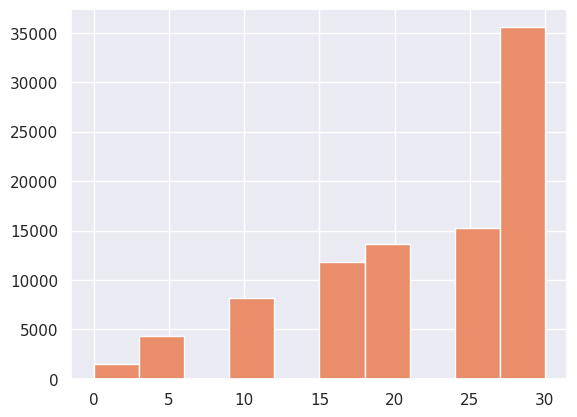

In [ ]:
plt.hist(train.metro_dist)
plt.show()

In [ ]:
train["metro_dist"] = train["metro_dist"].fillna(train["metro_dist"].mean())

## build_tech

Сильно коррелирует с таргетом - это важный признак, к тому же категориальный. Обучим случайный лес для заполнения пропусков

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
bt_fillna_train = train[train["build_tech"].notnull()].drop(columns=["build_tech", 'price'])
bt_fillna_target = train[train["build_tech"].notnull()]["build_tech"].astype(int)

In [ ]:
bt_fillna = RandomForestClassifier()
bt_fillna.fit(bt_fillna_train, bt_fillna_target)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(bt_fillna_target, bt_fillna.predict(bt_fillna_train))

0.9999850041238659

In [ ]:
fill_with = pd.DataFrame({'build_tech': bt_fillna.predict(train[train["build_tech"].isna()].drop(columns=["build_tech", "price"]))}, index = train.index[train["build_tech"].isna()]).squeeze()

In [ ]:
train['build_tech'].fillna(fill_with, inplace=True)

In [ ]:
train['build_tech'] = train['build_tech'].apply(lambda x: int(x))

# CatBoost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from catboost import Pool
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
X = train.drop(columns='price')
y = train.price.values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

In [ ]:
features = X.columns
cat_features = ['build_tech', 'month', 'street_id']

train_pool = Pool(data=train[features], label=y, cat_features=cat_features)

In [ ]:
model = CatBoostRegressor(n_estimators=10000, depth=6, learning_rate=0.05, random_state=42,
                          loss_function='MAE', eval_metric='MAE')

model.fit(train_pool, verbose=False)

n_estimators=100, все фичи

In [ ]:
pred = model.predict(X_test[features])
mae(y_test, pred)

761298.1306784358

n_estimators=1000, все фичи

In [ ]:
pred = model.predict(X_test[features])
mae(y_test, pred)

441409.12274834735

n_estimators=10000, все фичи

In [ ]:
pred = model.predict(X_test[features])
mae(y_test, pred)

365504.099103258

In [ ]:
features = ['street_id', 'build_tech', 'floor', 'area', 'rooms', 'balcon',
            'metro_dist', 'n_photos', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5', 'kw6',
            'kw7', 'kw10', 'kw11', 'kw12', 'kw13', 'year', 'month',
            'months_from_start']
cat_features = ['build_tech', 'month', 'street_id']

train_pool = Pool(data=train[features], label=y, cat_features=cat_features)

In [ ]:
model = CatBoostRegressor(n_estimators=10000, depth=6, learning_rate=0.05, random_state=42,
                          loss_function='MAE', eval_metric='MAE')

model.fit(train_pool, verbose=False)

n_estimators = 10000, не все фичи

In [ ]:
pred = model.predict(X_test[features])
mae(y_test, pred)

365030.9210007213

на валидации стало чуть лучше, на тесте(в лидерборде) стало сильно хуже

# Предсказание

In [ ]:
test = pd.read_csv("Test.csv")

In [ ]:
test.isna().any()

id            False
date          False
street_id     False
build_tech     True
floor         False
area          False
rooms         False
balcon        False
metro_dist     True
g_lift         True
n_photos      False
kw1           False
kw2           False
kw3           False
kw4           False
kw5           False
kw6           False
kw7           False
kw8           False
kw9           False
kw10          False
kw11          False
kw12          False
kw13          False
dtype: bool

In [ ]:
test['year'] = pd.DatetimeIndex(test['date']).year
test['month'] = pd.DatetimeIndex(test['date']).month
test['months_from_start'] = (pd.DatetimeIndex(test['date']).year - 2011) * 12 + pd.DatetimeIndex(test['date']).month

In [ ]:
test = test[features]

In [ ]:
test["metro_dist"].fillna(train["metro_dist"].mean(), inplace=True)

In [ ]:
fill_with = pd.DataFrame({'build_tech': bt_fillna.predict(test[test["build_tech"].isna()].drop(columns=["build_tech"]))},
                         index = test.index[test["build_tech"].isna()]).squeeze()

In [ ]:
test['build_tech'].fillna(fill_with, inplace=True)

In [ ]:
test['build_tech'] = test['build_tech'].apply(lambda x: int(x))

In [ ]:
ans = pd.read_csv("Test.csv")
ans["price"] = model.predict(test[features])
ans[["id", "price"]].to_csv("10000_catboost_notall.csv", index=False)

# Результат

По итогам соревновния лучший результат показал катбуст на всех данных на 10к деревьев, с private score = 850k.